In [7]:
from google.colab import drive
drive.mount('/content/drive')
import io
#!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/train.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/data")
zip_ref.close()


In [0]:
#!ls "/content/drive/My Drive"

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [0]:
!ls

drive  sample_data


In [0]:
import librosa.display
import librosa
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/data/Train/1.wav')

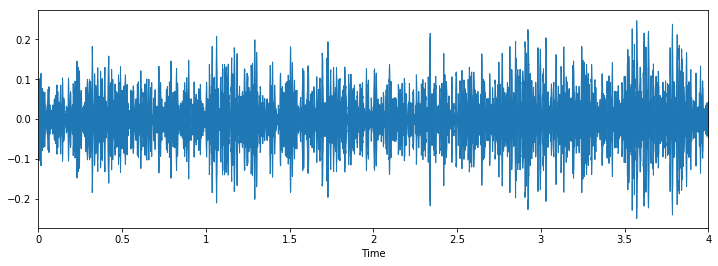

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [23]:
file_names = glob.glob("/content/drive/My Drive/data/Train/*.wav")
file_names = file_names[:500]
len(file_names)

500

In [24]:
import IPython.display as ipd
ipd.Audio(file_names[10])

In [25]:
type(data)

numpy.ndarray

In [0]:
labels = pd.read_csv('/content/drive/My Drive/data/train.csv')

In [46]:
label = labels.iloc[:500,:].values
print(label.shape)
data.shape

(500, 2)


(350, 252)

In [28]:
data = np.reshape(data,(350,252))
shape1 = data.shape
shape1

(350, 252)

In [30]:
y = []
label[1:10]

array([[1, 'street_music'],
       [2, 'drilling'],
       [3, 'siren'],
       [4, 'dog_bark'],
       [6, 'children_playing'],
       [10, 'street_music'],
       [11, 'drilling'],
       [12, 'gun_shot'],
       [15, 'dog_bark']], dtype=object)

In [0]:
sound_features = []
incompatible = {}
for file_name in file_names:
    X, sample_rate = librosa.load(file_name)
    #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    if X.shape == shape1:
       sound_features.append(np.reshape(X,(350,252)))
    else :
      incompatible[file_name] = X

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y =  labelencoder.fit_transform(np.asarray(label[:,1:2]))
file_name

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'/content/drive/My Drive/data/Train/8144.wav'

In [0]:
#for key in incompatible.keys():
# print(key)
sound_features = []
i = 0
for key,value in incompatible.items():
  if len(value) == 88200:
    sound_features.append(np.reshape(value,(350,252)))
    i += 1
  else:
    y[i] = 100
    i += 1
    

In [49]:
len(sound_features)

412

In [50]:
len(y)

500

In [51]:
y_new = []
for i in range(len(y)):
  if y[i] !=100:
    y_new.append(y[i])
 
len(y_new)

412

In [0]:
X = np.asarray(sound_features)

In [53]:
X.shape

(412, 350, 252)

In [0]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [55]:
y = one_hot(np.asarray(y_new),10)
y.shape

(412, 10)

In [57]:
"""
labels['Class'] = labelencoder.fit_transform(labels['Class'])
y = onehotencoder.fit_transform(labels).toarray()
y = y[:,:-1]
num_labels = y.shape[1]

"""

"\nlabels['Class'] = labelencoder.fit_transform(labels['Class'])\ny = onehotencoder.fit_transform(labels).toarray()\ny = y[:,:-1]\nnum_labels = y.shape[1]\n\n"

In [58]:
y.shape

(412, 10)

In [60]:
y[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [63]:
X = np.reshape(X,(412,350,252,1))
X.shape

(412, 350, 252, 1)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [66]:
model = Sequential()

model.add(Conv2D(32,5,activation = 'relu',input_shape = (350, 252,1)))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(32,3,activation = 'relu'))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(32,3,activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

W0810 11:12:55.864246 139863245113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 11:12:55.892235 139863245113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [69]:
model.fit(X, y, batch_size=32, epochs=10)

Epoch 1/10
412/412 [==============================] - 28s 67ms/step - loss: 0.7735 - acc: 0.7791
Epoch 2/10
412/412 [==============================] - 28s 67ms/step - loss: 0.6540 - acc: 0.8058
Epoch 3/10
412/412 [==============================] - 28s 67ms/step - loss: 0.5974 - acc: 0.8131
Epoch 4/10
412/412 [==============================] - 28s 68ms/step - loss: 0.4923 - acc: 0.8665
Epoch 5/10
412/412 [==============================] - 28s 67ms/step - loss: 0.4879 - acc: 0.8689
Epoch 6/10
412/412 [==============================] - 28s 68ms/step - loss: 0.4214 - acc: 0.8883
Epoch 7/10
412/412 [==============================] - 28s 68ms/step - loss: 0.3520 - acc: 0.9005
Epoch 8/10
412/412 [==============================] - 28s 68ms/step - loss: 0.3041 - acc: 0.9272
Epoch 9/10
412/412 [==============================] - 28s 68ms/step - loss: 0.2691 - acc: 0.9320
Epoch 10/10
412/412 [==============================] - 28s 68ms/step - loss: 0.2205 - acc: 0.9417


In [0]:
y_pred = model.predict(X_test)

In [0]:
y_labels = np.argmax(y_pred,axis=-1)

In [0]:
# Generator Model

from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D,Reshape
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop

In [0]:
generator_model = Sequential()
generator_model.add(Dense(175*126,input_dim = 100,activation = 'relu'))
generator_model.add(Reshape((175,126,1)))
generator_model.add(BatchNormalization(momentum = 0.9))

generator_model.add(UpSampling2D())
generator_model.add(Conv2DTranspose(3,5,padding = 'same',activation = 'relu'))
generator_model.add(BatchNormalization(momentum = 0.9))

generator_model.add(Conv2DTranspose(1,5,padding = 'same',activation = 'sigmoid'))

generator_model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [0]:
input_ = np.random.uniform(-1,1,100)

In [111]:
input_ = np.reshape(input_,(1,100))
input_.shape

(1, 100)

In [0]:
audio = generator_model.predict(input_)

In [94]:
audio.shape

(1, 350, 252, 1)

In [0]:
audio = audio.reshape(88200)

In [114]:
audio.shape

(88200,)

In [0]:
import numpy as np
from scipy.io.wavfile import write
scaled = np.int16(audio/np.max(np.abs(audio)) * 32767)
write('generated_audio.wav', 22050, scaled)

In [122]:
import IPython.display as ipd
ipd.Audio('generated_audio.wav')